In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Ayush\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.listdir("../mnist-in-csv")

['mnist_test.csv', 'mnist_train.csv']

In [3]:
training_data = pd.read_csv("../mnist-in-csv/mnist_train.csv")
testing_data = pd.read_csv("../mnist-in-csv/mnist_test.csv")

In [4]:
X_train = training_data.drop('label', axis=1).values
#ain = X_train.values.reshape(X_train.shape[0],28,28,1)
X_train = X_train/255
Y_train = training_data['label'].values
X_test = testing_data.drop('label', axis=1).values
#_test = X_test.values.reshape(X_test.shape[0],28,28,1)
X_test = X_test/255
Y_test = testing_data['label'].values

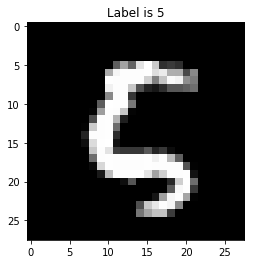

In [5]:
index = 2000
img = X_train[index].reshape((28,28))
plt.title('Label is {label}'.format(label=Y_train[index]))
plt.imshow(img, cmap='gray')

In [78]:
print(X_train[:1000].shape)
print(Y_train[:1000].reshape(1000,1).shape)
print(X_test.shape)
print(Y_test.shape)
X_train.dtype

(1000, 784)
(1000, 1)
(10000, 784)
(10000,)


dtype('float64')

In [51]:
X = tf.placeholder(shape=(None, 784), dtype=tf.float64)
Y = tf.placeholder(shape=(None,1), dtype=tf.float64)

In [8]:
W1 = tf.get_variable('W1', shape=[5,5,1,4], initializer=tf.contrib.layers.xavier_initializer(seed=0), dtype=tf.float64)
W2 = tf.get_variable('W2', shape=[5,5,4,8], initializer=tf.contrib.layers.xavier_initializer(seed=0), dtype=tf.float64)

In [52]:
x_image = tf.reshape(X, [-1,28,28,1])

In [53]:
x_image[1]

<tf.Tensor 'strided_slice_2:0' shape=(28, 28, 1) dtype=float64>

In [54]:
Z1 = tf.nn.conv2d(x_image, W1, strides=[1,1,1,1],padding='SAME')

In [55]:
A1 = tf.nn.relu(Z1)

In [56]:
P1 = tf.nn.max_pool(A1, [1,2,2,1], [1,2,2,1], 'SAME')

In [57]:
P1.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(4)])

In [58]:
Z2 = tf.nn.conv2d(P1, W2, [1,1,1,1], 'SAME')

In [59]:
A2 = tf.nn.relu(Z2)

In [60]:
P2 = tf.nn.max_pool(A2, [1,2,2,1], [1,2,2,1], 'SAME')

In [61]:
P2.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(8)])

In [62]:
P2 = tf.contrib.layers.flatten(P2)

In [70]:
Z3 = tf.contrib.layers.fully_connected(P2, 1, activation_fn=None)

In [71]:
Z3.shape

TensorShape([Dimension(None), Dimension(1)])

In [72]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))

In [73]:
cost

<tf.Tensor 'Mean_2:0' shape=() dtype=float64>

In [74]:
learning_rate = 0.009
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(cost)

In [80]:
init = tf.global_variables_initializer()

In [79]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(100):
        _, cost = sess.run([train, cost], feed_dict = {X: X_train[:1000], Y: Y_train[:1000].reshape(1000,1)})
        
        if epoch %5 ==0:
            print("Cost after epoch %i: %f" % (epoch, cost))
        
    

Cost after epoch 0: 0.000000


TypeError: Fetch argument 0.0 has invalid type <class 'numpy.float64'>, must be a string or Tensor. (Can not convert a float64 into a Tensor or Operation.)